In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_multi.npy`. 

In [3]:
data = np.load('reg_multi.npy')

In [4]:
xs = data[:, :-1]
ys = data[:,-1]

In [5]:
t_xs = torch.from_numpy(xs) 
t_ys = torch.from_numpy(ys).view(-1,1)

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(16,256),torch.nn.ReLU(), 
                            torch.nn.Linear(256,128),torch.nn.ReLU(), 
                            torch.nn.Linear(128,64),torch.nn.ReLU(), 
                            torch.nn.Linear(64,32),torch.nn.ReLU(), 
                            torch.nn.Linear(32,1))



In [7]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(50000,10000))

In [8]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

optimizer = torch.optim.SGD(model.parameters(), lr =0.01)
loss_func = torch.nn.MSELoss()

In [9]:
err_train=[]
err_valid=[]

In [10]:
%%time

for epoch in range(400):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        err_train.append(loss.item())

        loss.backward()
        optimizer.step()
   
    if epoch%10 == 0:
        print("epoch %d %f  " % (epoch, loss) )   

epoch 0 0.242495  
epoch 10 0.242656  
epoch 20 0.242726  
epoch 30 0.242834  
epoch 40 0.242889  
epoch 50 0.242231  
epoch 60 0.239492  
epoch 70 0.231533  
epoch 80 0.188898  
epoch 90 0.115855  
epoch 100 0.091526  
epoch 110 0.091289  
epoch 120 0.072831  
epoch 130 0.057686  
epoch 140 0.049803  
epoch 150 0.041546  
epoch 160 0.037794  
epoch 170 0.041320  
epoch 180 0.041110  
epoch 190 0.030350  
epoch 200 0.031848  
epoch 210 0.028522  
epoch 220 0.029050  
epoch 230 0.033080  
epoch 240 0.033112  
epoch 250 0.022821  
epoch 260 0.022666  
epoch 270 0.021369  
epoch 280 0.020721  
epoch 290 0.019565  
epoch 300 0.019799  
epoch 310 0.019790  
epoch 320 0.017977  
epoch 330 0.017458  
epoch 340 0.017176  
epoch 350 0.017899  
epoch 360 0.015702  
epoch 370 0.018685  
epoch 380 0.017499  
epoch 390 0.018575  
CPU times: user 25min 33s, sys: 13min 14s, total: 38min 48s
Wall time: 14min 12s


In [11]:
with torch.no_grad():
    valid_pred  = model(valid_set[:][0])
    valid_loss  = loss_func(valid_pred, valid_set[:][1])
    
    train_pred  = model(train_set[:][0])
    train_loss  = loss_func(train_pred,train_set[:][1])

print("final loss calculation:")
print("train set:\tloss = {:}\nvalidation set:\t loss = {:}".format(train_loss,valid_loss))

final loss calculation:
train set:	loss = 0.020955650135874748
validation set:	 loss = 0.06936105340719223


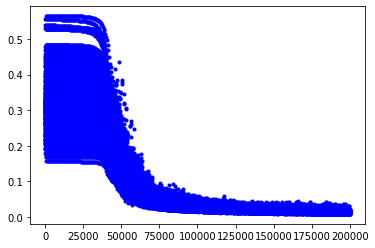

In [12]:
plt.plot(err_train, '.', label='train', color = 'blue')

In [14]:
torch.save(model, "regression_multi.pt")